In [286]:
import numpy as np
import matplotlib.pyplot as plt

In [287]:
deg2rad = np.pi / 180.0
rad2deg = 180.0 / np.pi

In [288]:
alpha = 0.001
dphi = 2*deg2rad
dtheta1_d = 2*3.864
dtheta2_d = 2
dtheta3_d = 2
dt = 1e-3
tot_time = 10.0
N_steps = int(tot_time / dt)
N_phi = int(2*np.pi/ dphi)

In [289]:
stab_par1 = alpha * dt * ((1/(dtheta1_d*deg2rad)**2)+(1/(dphi)**2)) + ((6*deg2rad)/dtheta1_d*deg2rad)*dt + ((5*deg2rad)/(0.0697*dphi))*dt
stab_par2 = alpha * dt * ((1/(dtheta2_d*deg2rad)**2)+(1/(dphi)**2)) + ((6*deg2rad)/dtheta1_d*deg2rad)*dt + ((5*deg2rad)/(0.7071*dphi))*dt
stab_par3 = alpha * dt * ((1/(dtheta3_d*deg2rad)**2)+(1/(dphi)**2)) + ((6*deg2rad)/dtheta1_d*deg2rad)*dt + ((5*deg2rad)/(1*dphi))*dt
print("Stability parameters:")
print(f"stab_par1: {stab_par1}")
print(f"stab_par2: {stab_par2}")
print(f"stab_par3: {stab_par3}")
assert stab_par1 <= 0.5, "Diffusion stability condition violated"
assert stab_par2 <= 0.5, "Diffusion stability condition violated"
assert stab_par3 <= 0.5, "Diffusion stability condition violated"

Stability parameters:
stab_par1: 0.03674391197012999
stab_par2: 0.0051772074914044185
stab_par3: 0.0041416396792137815


In [290]:
theta_1n = np.arange(1e-3, 5, dtheta1_d)
theta_2n = np.arange(5, 60, dtheta2_d)
theta_3 = np.arange(60, 120, dtheta3_d)
theta_2s = np.arange(120, 175, dtheta2_d)
theta_1s = np.arange(175, 180 - 1e-3, dtheta1_d)
print("theta_1n:", theta_1n.shape)
print("theta_2n:", theta_2n.shape)  
print("theta_3:", theta_3.shape)
print("theta_2s:", theta_2s.shape)
print("theta_1s:", theta_1s.shape)
N_theta = (len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s) + len(theta_1s))

theta_1n: (1,)
theta_2n: (28,)
theta_3: (30,)
theta_2s: (28,)
theta_1s: (1,)


In [291]:
theta_deg = np.concatenate((theta_1n, theta_2n, theta_3, theta_2s, theta_1s))
theta = theta_deg * deg2rad
dtheta1 = dtheta1_d * deg2rad
dtheta2 = dtheta2_d * deg2rad
dtheta3 = dtheta3_d * deg2rad

In [292]:
phi = np.arange(0, 2 * np.pi, dphi)
Phi, Theta = np.meshgrid(phi, theta)

In [293]:
Phi_deg = Phi * rad2deg
Theta_deg = Theta * rad2deg

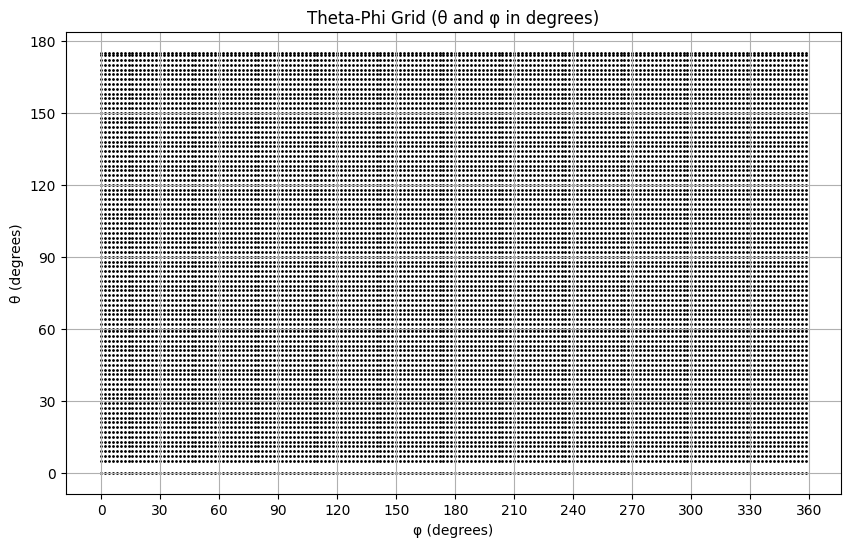

In [294]:
plt.figure(figsize=(10, 6))
plt.scatter(Phi_deg, Theta_deg, s=1, color='black')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.title("Theta-Phi Grid (θ and φ in degrees)")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.show()

In [295]:
sigma_t = 10 * deg2rad
sigma_p = 14.14 * deg2rad 
T_plus = 4*np.exp(-0.5*(((Theta - (15*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(5/6))/sigma_p)**2))
T_minus = -4*np.exp(-0.5*(((Theta - (9*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T = T_plus + T_minus

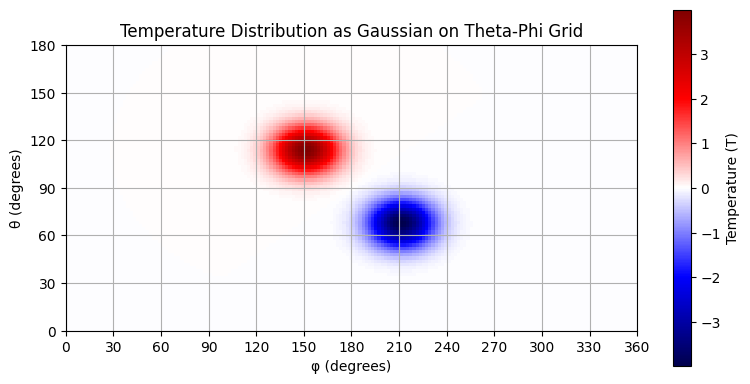

In [296]:
plt.figure(figsize=(8, 4))
plt.imshow(T, extent=(0, 360, 0, 180), aspect='equal', origin='lower', cmap='seismic')
plt.colorbar(label='Temperature (T)')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.title("Temperature Distribution as Gaussian on Theta-Phi Grid")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.tight_layout()
plt.show()

In [297]:
N_phi, N_theta

(180, 88)

In [298]:
Phi.shape

(88, 180)

In [299]:
dtheta_rad = np.zeros(N_theta)
dtheta_rad[:len(theta_1n)] = dtheta1
dtheta_rad[len(theta_1n):len(theta_1n) + len(theta_2n)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n):len(theta_1n) + len(theta_2n) + len(theta_3)] = dtheta3
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3):len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s):] = dtheta1

In [300]:
dtheta_rad

array([0.13487904, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490

In [301]:
print(T.shape)
T = T.T
print(T.shape)

(88, 180)
(180, 88)


In [302]:
cot = 1/np.tan(theta)
sin2 = (np.sin(theta))**2
senin = 1/(np.sin(theta))
sin = np.sin(theta)
cos = np.cos(theta)

In [303]:
all_values = np.zeros((N_steps+1, N_phi, N_theta))
all_values[0, :, :] = T

In [304]:
T_new = np.zeros_like(T)
T_new.shape

(180, 88)

In [305]:
v_mag = 12 * deg2rad
v_phi = (10* deg2rad) - (2.3 * (cos**2)) - (1.62 * (cos**4))
cutoff = 10 * deg2rad
v_theta = v_mag * np.sign(theta - np.pi/2)
v_theta[theta < cutoff] = 0
v_theta[theta > (np.pi - cutoff)] = 0

In [ ]:
for n in range(1,N_steps+1):
    for i in range(1,N_phi-1):
        for j in range(1,N_theta-1):
            if j== 0 or j == (N_theta - 2):
                diffusion = 0
            else:
                diffusion = alpha * dt * (((T[i, j+1] - 2*T[i, j] + T[i, j-1])/dtheta_rad[j]**2) 
                                          + cot[j] * ((T[i,j]-T[i,j-1])/dtheta_rad[j])
                                          + (1/sin2[j]) * ((T[i+1, j] - 2*T[i, j] + T[i-1, j])/dphi**2))
            vth = v_theta[j]
            if vth >= 0:
                advection_theta = dt * (-vth * (T[i,j] - T[i,j-1]) / dtheta_rad[j])
            else:
                advection_theta = dt * (-vth * (T[i,j+1] - T[i,j]) / dtheta_rad[j])

            advection_phi = dt * senin[j] * (v_phi[j] * (T[i, j] - T[i-1, j]) /dphi) 
            T_new[i,j] = T[i,j] + diffusion + advection_theta - advection_phi
    T_new[0, 1:-1] = T_new[-2, 1:-1] 
    T_new[-1, 1:-1] = T_new[1, 1:-1]
    T_new[1:-1, 0] = T_new[1:-1, 1]
    T_new[1:-1, -1] = T_new[1:-1, -2]
    T = T_new.copy()
    all_values[n, :, :] = T

/tmp/ipykernel_84651/2614834544.py:9: RuntimeWarning: overflow encountered in scalar multiply
  + (1/sin2[j]) * ((T[i+1, j] - 2*T[i, j] + T[i-1, j])/dphi**2))
/tmp/ipykernel_84651/2614834544.py:7: RuntimeWarning: invalid value encountered in scalar add
  diffusion = alpha * dt * (((T[i, j+1] - 2*T[i, j] + T[i, j-1])/dtheta_rad[j]**2)
/tmp/ipykernel_84651/2614834544.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  + cot[j] * ((T[i,j]-T[i,j-1])/dtheta_rad[j])
/tmp/ipykernel_84651/2614834544.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  advection_theta = dt * (-vth * (T[i,j] - T[i,j-1]) / dtheta_rad[j])
/tmp/ipykernel_84651/2614834544.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  advection_theta = dt * (-vth * (T[i,j] - T[i,j-1]) / dtheta_rad[j])
/tmp/ipykernel_84651/2614834544.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  T_new[i,j] = T[i,j] + diffusion + advection_theta - advection_phi
/tmp/ipyke

In [307]:
all_values = np.transpose(all_values, (0, 2, 1))

In [308]:
all_values_deg = all_values * rad2deg

In [309]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
cax = ax.imshow(all_values_deg[0], extent=[0, 360, 0, 180],aspect = 'equal', origin='lower', cmap='seismic', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature')
ax.set_title('2D Heat Diffusion')
ax.set_ylabel('θ (degrees)')
ax.set_xlabel('φ (degrees)')

def animate(frame):
    cax.set_array(all_values[frame])
    ax.set_title(f'2D Heat Diffusion at t = {frame*dt:.2f} s')
    return [cax]

interval_steps = 100
ani = FuncAnimation(fig, animate, frames=range(0, N_steps+1, interval_steps),interval=100, blit=True, repeat=False)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())